In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
pd.set_option('display.max_columns', None)

notebook_dir = os.getcwd()
os.chdir(notebook_dir);
print(notebook_dir)

/Users/franri/Documents/GitHub/Tesis


In [2]:
df = pd.read_excel("./Input/PATIENTS.xls")
df.head()

,Nº I.C.,FECHA RECEPCION,R.U.T.,NOMBRE DEL PACIENTE,SEXO,EDAD (AÑOS),TELEFONO,CELULAR,DIRECCION,COMUNA,"DESCRIPCION DE, DIAGNOSTICO",ESTABLECIMIENTO DE ORIGEN,ESTABLECIMIENTO DESTINO,POLICLINICO DE DESTINO,ESTADO,AUGE,T.E. FECHA RECEPCION,NSP,NSA,MOTIVO_IC,RUT_PROFESIONAL,NOMBRE_PROFESIONAL,ESPECIALIDAD,TIPO_IQ,PRESTACION,PRAIS,RNLE,N PAC,N PROF,N ESPEC
0,238666,1979,21688412-4,ELIZABETH ROMANEE CASTILLO SANCHEZ,FEMENINO,14,81315113,65644497,JOSE BUNSTER 1947 1947,ANGOL,COLELITIASIS / COLECISTECTOMIA LAPAROSCOPICA,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,345,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,7108401,IVAN SEPULVEDA NUÑEZ,CIRUGIA GENERAL,2,18-02-081,N,N,0,12.0,0
1,267723,1965,21450864-8,BRIAN ALEXANDER POBLETE VARELA,MASCULINO,15,34817400,56823861,LAS ENCINAS 49 VILLA TIJERAL 49,ANGOL,POLIPO VESICULAR DE BACINETE / COLECISTECTOMIA...,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,59,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,10789485,ANGEL RODRIGO PARADA HENRIQUEZ,CIRUGIA GENERAL,1,18-02-081,N,N,1,0.0,0
2,255701,1964,20977380-5,NADIA MALDONADO MEDINA,FEMENINO,16,75429174,93135802,PALACIO DE VERSALLES 1760 VILLA FRANCIA 1760,COLLIPULLI,COLELITIASIS / COLECISTECTOMIA VL,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,183,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,17345901,JAVIER VASQUEZ PEDRERO,CIRUGIA GENERAL,1,18-02-081,N,N,2,14.0,0
3,266606,1962,20977353-8,ROSA MARIA TERESA WILLSON SALDAÑA,FEMENINO,16,76669743,57830258,CARLOS CASANUEVA 403 403,COLLIPULLI,HERNIA INGUINAL IZQ / HERNIOPLASTIA,H. ANGOL,H. ANGOL,"HERNIA INGUINAL, CRURAL, UMBILICAL, DE LA LINE...",ACEPTADA,NO,70,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,26246886,JOSEMILY BRAVO SILVA,CIRUGIA GENERAL,1,18-02-003,N,N,3,15.0,0
4,271264,1961,21060611-4,CAMILA ANDREA ZAMBRANO DE LA HOZ,MASCULINO,16,54441068,33369356,MANZANARES S/N 0,RENAICO,ONICOCRIPTOSIS / ONICECTOMIA (CX MENOR),H. ANGOL,H. ANGOL,RESECCION O PLASTIA,ACEPTADA,NO,30,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,26246886,JOSEMILY BRAVO SILVA,CIRUGIA GENERAL,1,14-02-029,N,N,4,15.0,0


In [ ]:
df = pd.read_excel("./Input/PATIENTS.xls")
df = df[["Nº I.C.", "FECHA RECEPCION", "NOMBRE DEL PACIENTE", "EDAD (AÑOS)", "COMUNA",
        "T.E. FECHA RECEPCION", "ESPECIALIDAD", "TIPO_IQ"]];
df.rename(columns={"Nº I.C.": "id", "FECHA RECEPCION": "fecha", "NOMBRE DEL PACIENTE": "nombre", "EDAD (AÑOS)": "edad",
                  "COMUNA": "comuna", "T.E. FECHA RECEPCION": "espera", "ESPECIALIDAD": "especialidad", "TIPO_IQ": "tipo"}, inplace=True);
df["prioridad"] = (1 + df["espera"] * df["edad"] * 0.0001).astype(int);

df_low = df.sort_values(by="prioridad", ascending=True);
df_high = df.sort_values(by="prioridad", ascending=False);
df_high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 550 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            553 non-null    int64 
 1   fecha         553 non-null    int64 
 2   nombre        553 non-null    object
 3   edad          553 non-null    int64 
 4   comuna        553 non-null    object
 5   espera        553 non-null    int64 
 6   especialidad  553 non-null    object
 7   tipo          553 non-null    int64 
 8   prioridad     553 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 43.2+ KB


In [17]:

df_low.to_csv("./Input/LowPriority.csv", index=False);

df_high.to_csv("./Input/HighPriority.csv", index=False);

df_sample = df.sample(553, random_state=258);
df_sample.to_csv("./Input/AllPriority.csv", index=False);

print("Files created!");

Files created!


Estadísticas descriptivas para LowPriority.csv:
                  id        fecha        edad      espera        tipo  \
count     150.000000   150.000000  150.000000  150.000000  150.000000   
mean   254195.980000  1617.746667   24.433333  196.333333    1.300000   
std     18477.734753   347.631491   21.230729  183.991416    0.599216   
min    204022.000000   871.000000    1.000000    2.000000    1.000000   
25%    241635.500000  1257.250000    6.000000   49.250000    1.000000   
50%    260197.000000  1818.500000   22.000000  137.000000    1.000000   
75%    269074.250000  1897.500000   30.000000  320.500000    1.000000   
max    274662.000000  2012.000000   73.000000  717.000000    3.000000   

       prioridad  
count      150.0  
mean         1.0  
std          0.0  
min          1.0  
25%          1.0  
50%          1.0  
75%          1.0  
max          1.0  

Estadísticas descriptivas para HighPriority.csv:
                  id        fecha        edad      espera      tipo  \
co

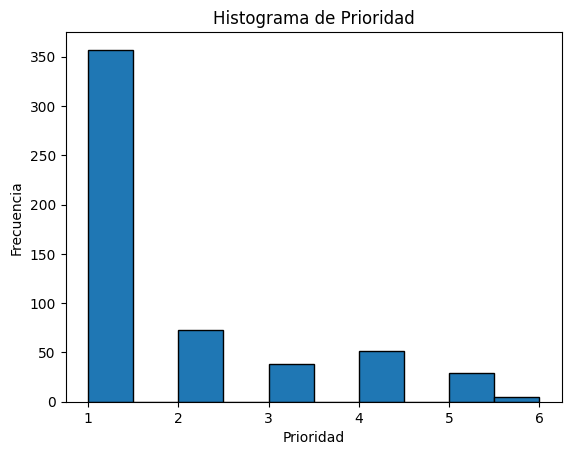

In [5]:
low_priority_df = pd.read_csv("./Input/LowPriority.csv").head(150);
high_priority_df = pd.read_csv("./Input/HighPriority.csv").head(150);
all_priority_df = pd.read_csv("./Input/AllPriority.csv").head(150);

low_priority_stats = low_priority_df.describe();
high_priority_stats = high_priority_df.describe();
all_priority_stats = all_priority_df.describe();

print("Estadísticas descriptivas para LowPriority.csv:");
print(low_priority_stats);
print("\nEstadísticas descriptivas para HighPriority.csv:");
print(high_priority_stats);
print("\nEstadísticas descriptivas para AllPriority.csv:");
print(all_priority_stats);

plt.hist(df["prioridad"], bins=10, edgecolor="black");
plt.xlabel("Prioridad");
plt.ylabel("Frecuencia");
plt.title("Histograma de Prioridad");
plt.savefig("histograma_prioridad.png");
plt.show();

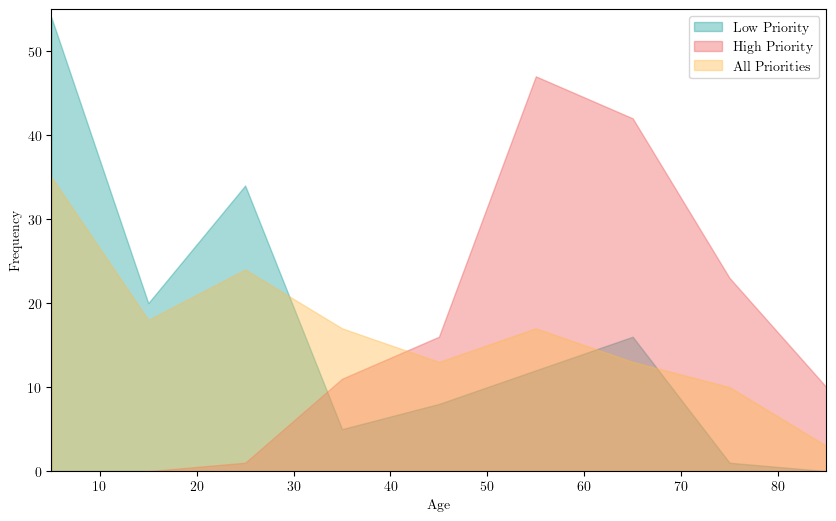

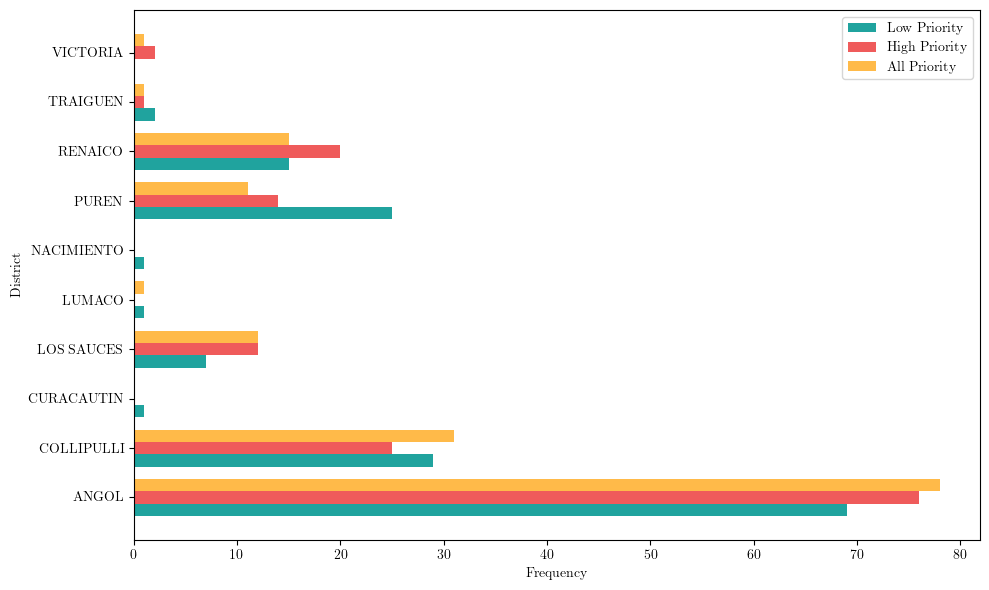

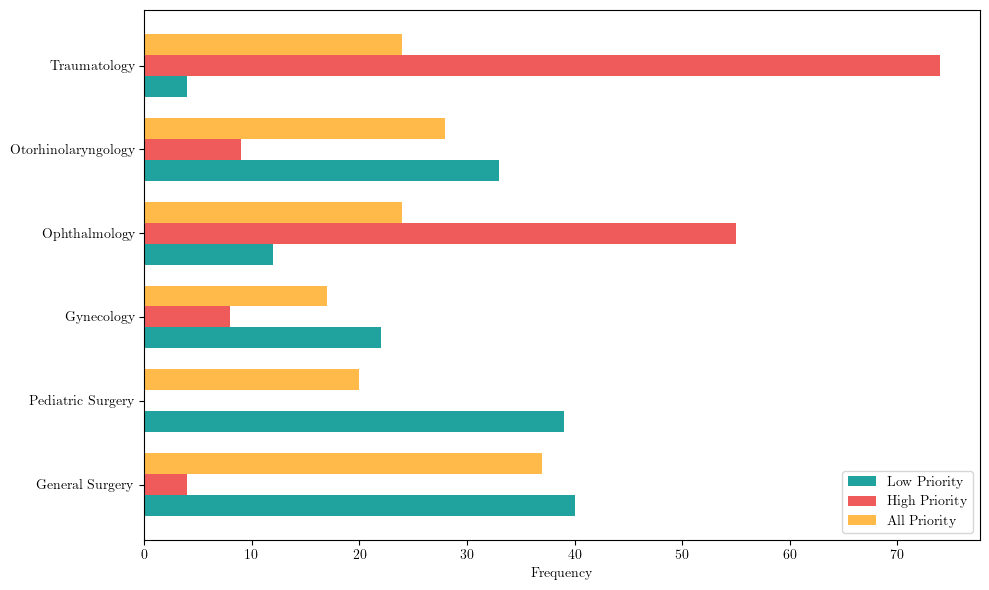

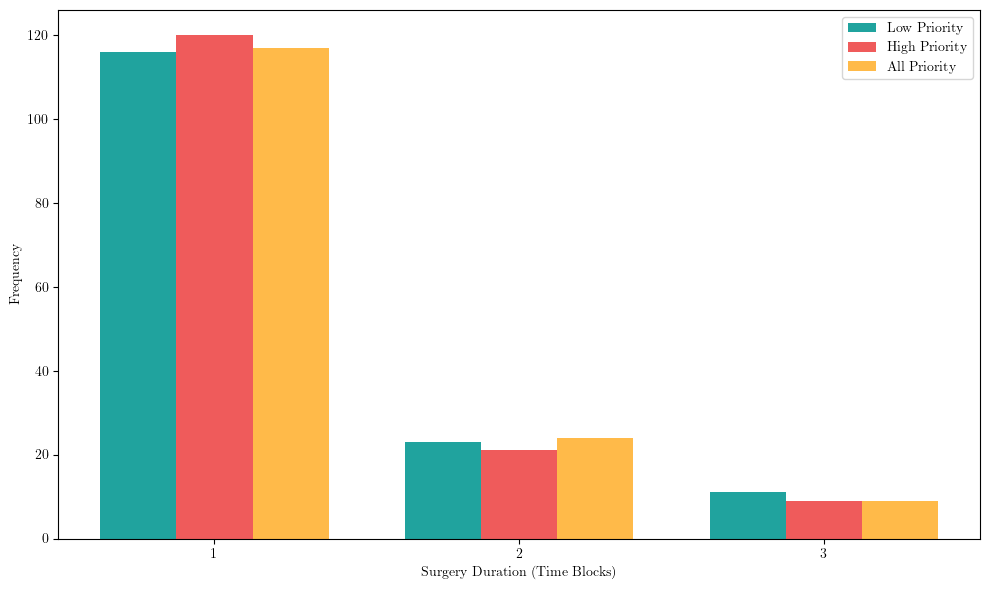

In [31]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

spanish_to_english_specialties = {
    'Cirugía General': 'General Surgery',
    'Cirugía Cardiaca': 'Cardiac Surgery',
    'Oftalmología': 'Ophthalmology',
    'Ginecología': 'Gynecology',
    'Pediatría': 'Pediatrics',
    "TRAUMATOLOGIA": "Traumatology",
    "OTORRINOLARINGOLOGIA": "Otorhinolaryngology",
    "OFTALMOLOGIA": "Ophthalmology",
    "GINECOLOGIA": "Gynecology",
    "CIRUGIA INFANTIL": "Pediatric Surgery",
    "CIRUGIA GENERAL": "General Surgery"
}

plt.figure(figsize=(10, 6))
min_age = min(low_priority_df["edad"].min(), high_priority_df["edad"].min(), all_priority_df["edad"].min())
max_age = max(low_priority_df["edad"].max(), high_priority_df["edad"].max(), all_priority_df["edad"].max())
bins = np.arange(min_age - (min_age % 10), max_age + (10 - max_age % 10) + 1, 10)
counts_low, edges = np.histogram(low_priority_df["edad"], bins=bins)
counts_high, _ = np.histogram(high_priority_df["edad"], bins=bins)
counts_all, _ = np.histogram(all_priority_df["edad"], bins=bins)
bin_centers = (edges[:-1] + edges[1:]) / 2
plt.fill_between(bin_centers, 0, counts_low, alpha=0.4, color="#20a39e", label='Low Priority')
plt.fill_between(bin_centers, 0, counts_high, alpha=0.4, color="#ef5b5b", label='High Priority')
plt.fill_between(bin_centers, 0, counts_all, alpha=0.4, color="#ffba49", label='All Priorities')
plt.xlabel(r"Age")
plt.ylabel(r"Frequency")
plt.title(r"")
plt.xticks(bins)
plt.xlim(5, 85)
plt.ylim(0, 55)
plt.legend()
plt.savefig("AgePlot.png")
plt.show()

plt.figure(figsize=(10, 6))
district_low = low_priority_df["comuna"].value_counts().sort_index()
district_high = high_priority_df["comuna"].value_counts().sort_index()
district_all = all_priority_df["comuna"].value_counts().sort_index()
district_union = district_low.index.union(district_high.index).union(district_all.index)
district_low = district_low.reindex(district_union, fill_value=0)
district_high = district_high.reindex(district_union, fill_value=0)
district_all = district_all.reindex(district_union, fill_value=0)
y = np.arange(len(district_union))
height = 0.25
plt.barh(y - height, district_low, height=height, color="#20a39e", label='Low Priority')
plt.barh(y, district_high, height=height, color="#ef5b5b", label='High Priority')
plt.barh(y + height, district_all, height=height, color="#ffba49", label='All Priority')
plt.xlabel(r"Frequency")
plt.ylabel(r"District")
plt.title(r"")
plt.yticks(y, district_union)
plt.legend()
plt.tight_layout()
plt.savefig("DistrictPlot.png")
plt.show()

plt.figure(figsize=(10, 6))
specialty_low = low_priority_df["especialidad"].value_counts().sort_index()
specialty_high = high_priority_df["especialidad"].value_counts().sort_index()
specialty_all = all_priority_df["especialidad"].value_counts().sort_index()
specialty_union = specialty_low.index.union(specialty_high.index).union(specialty_all.index)
specialty_low = specialty_low.reindex(specialty_union, fill_value=0)
specialty_high = specialty_high.reindex(specialty_union, fill_value=0)
specialty_all = specialty_all.reindex(specialty_union, fill_value=0)
y = np.arange(len(specialty_union))
height = 0.25
plt.barh(y - height, specialty_low, height=height, color="#20a39e", label='Low Priority')
plt.barh(y, specialty_high, height=height, color="#ef5b5b", label='High Priority')
plt.barh(y + height, specialty_all, height=height, color="#ffba49", label='All Priority')
specialty_union_english = [spanish_to_english_specialties.get(spec, spec) for spec in specialty_union]
plt.xlabel(r"Frequency")
plt.ylabel(r"")
plt.title(r"")
plt.yticks(y, specialty_union_english)
plt.legend()
plt.tight_layout()
plt.savefig("SpecialtyPlot.png")
plt.show()

plt.figure(figsize=(10, 6))
type_low = low_priority_df["tipo"].value_counts().sort_index()
type_high = high_priority_df["tipo"].value_counts().sort_index()
type_all = all_priority_df["tipo"].value_counts().sort_index()
type_union = type_low.index.union(type_high.index).union(type_all.index)
type_low = type_low.reindex(type_union, fill_value=0)
type_high = type_high.reindex(type_union, fill_value=0)
type_all = type_all.reindex(type_union, fill_value=0)
x = np.arange(len(type_union))
width = 0.25
plt.bar(x - width, type_low, width=width, color="#20a39e", label='Low Priority')
plt.bar(x, type_high, width=width, color="#ef5b5b", label='High Priority')
plt.bar(x + width, type_all, width=width, color="#ffba49", label='All Priority')
plt.xlabel(r"Surgery Duration (Time Blocks)")
plt.ylabel(r"Frequency")
plt.title(r"")
plt.xticks(x, type_union)
plt.legend()
plt.tight_layout()
plt.savefig("IQPlot.png")
plt.show()

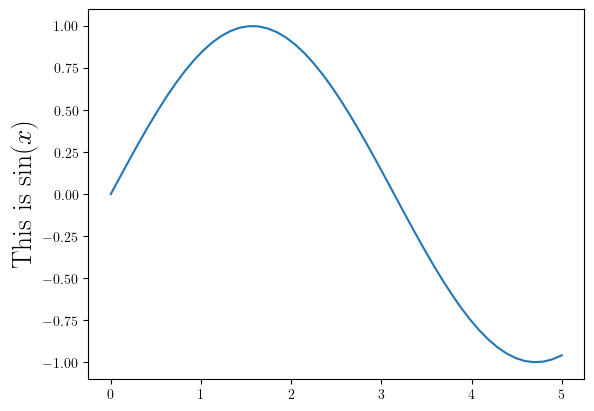

In [28]:
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

x = plt.linspace(0,5)
plt.plot(x,plt.sin(x))
plt.ylabel(r"This is $\sin(x)$", size=20)
plt.show()